# 의사결정나무
* SVM처럼 결정 나무는 분류와 회귀 작업 다중 출력 작업도 가능한 다재다능한 머신러닝 알고리즘임
* 결정 나무는 가장 강력한 머신러닝 알고리즘중 하나인 랜덤포레스트의 기본 구성 요소이기도 함

## 의사결정나무 훈련과 시각화
* 붓꽃 데이터를 이용하여 의사결정나무 모델을 훈련시키고 예측하는 방법을 설명

### 의사결정나무 훈련
* DecisionTreeClassifier 분류기를 이용하여 붗꼿을 꽃잎의 길이와 너비 기준으로 분류하는 훈련과정을 실행
* 의사결정나무 방식의 최대 장점은 데이터 전처리 불필요하다는 것
    * max_depth: 의사결정나무의 최대 깊이 지정. 여기서는 2 사용. 즉, 연속된 가지치기는 최대 2번까기 가능

In [16]:
#사이킷런 임포트
import sklearn

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

### 의사결정나무 시각화
* export_graphviz() 함수
    * 훈련 결과를 그래프 정보로 변환한 후 iris_tree.dot 파일에 저장
    * Source 클래스의 from_file() 클래스 메서드
    * dot 파일에 저장된 그래프를 직접 주피터 노트북에 보여줄 때 사용
    * max_depth=2 이였기 때문에 깊이가 최대 2인 의사결정나무가 생성

In [26]:
pwd

'/home/dilab/AIwithPython'

In [27]:
from sklearn import tree

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

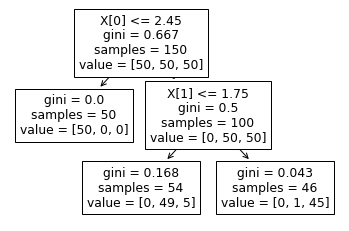

In [28]:
tree.plot_tree(tree_clf)

### 나무 구성 요소
* 나무(tree)의 기본 구성요소는 아래와 같음
    * 마디(node): 가지치기가 시작되는 지점.
    * 뿌리 마디(root node): 맨 상단에 위치한 마디
    * 즉, 가지치기가 시작하는 지점의 마디
    * 나뭇잎(leaf node): 더 이상의 가기치기가 발생하지 않는 마디
    
## 예측과 지니 불순도
* 훈련 결과를 이용하여 어떻게 예측하는지를 예를 이용하여 살펴보자. 데이터가 주어지면 뿌리 마디(맨 위에 위치한 마디)에서 시작
    * 꽃잎 길이가 2.45cm 이하
        * 뿌리 마디에서 시작하여 왼편으로 이동(setosa 품종으로 결론)
    * 꽃잎 길이 2.45 초과
        * 뿌리 마디에서 시작하여 오른편으로 이동
        * 꽃잎 너비가 1.75 이하
            * 왼편으로 이동. versicolor 품종으로 결론
        * 꽃 너비가 1.75 초과
            * 오른편으로 이동. virginica 품종으로 결론

### 지니 불순도
* 마디에 포함된 `gini` 속성은 해당 마디의 **지니 불순도**(impurity)를 가리키며,다음과 같이 계산됨

$$G = 1 - \sum_{k=0}^{K-1} p_{k}^2$$

* 여기서, $K$는 클래스 수이고, $p_k$는 클래스 $k$에 속한 샘플의 비율임
* 예를 들어, 깊이 2의 왼편 마디의 지니 불순도는 다음과  같이 0.168임
각각의 확률을 구해보면 다음과 같음 $p_0= 0/54, \quad p_1=49/54, \quad p_2 = 5/54$

$$G = 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168$$

### 의사결정 나무의 결정 경계
* 아래 코드에 정의된 `plot_decision_boundary()` 함수는 결정 경계를 그래프로 그리는 기능을 제공함

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

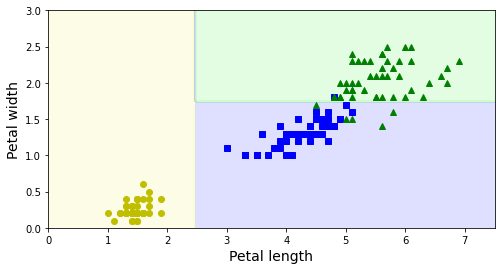

In [32]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
#plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
#plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
#plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
#plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
#plt.text(1.40, 1.0, "Depth=0", fontsize=15)
#plt.text(3.2, 1.80, "Depth=1", fontsize=13)
#plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

* 위 그래프에서 사용된 결정 경계는 다음 정보에서 얻어짐

    * Depth=0(깊이=0)
        * 뿌리 마디에서의 결정 경계
        * `petal lengh(cm) <= 2.45`에 해당
    * Depth=1(깊이=1)
        * 깊이 1의 오른편 마디에서의 결정 경계
        * `petal width(cm) <= 1.75`에 해당
    * Depth=2(깊이=2)
        * 깊이 2의 두 마디에서의 결정 경계
        * 아랫쪽: `petal width(cm) <= 4.95`에 해당
        * 윗쪽: `petal width(cm) <= 4.85`에 해당

## 의사결정나무 훈련 규제
사이킷런 의사결정나무 훈련 알고리즘의 규제에 사용되는 주요 옵션
* `max_depth`: 의사결정나무의 최대 높이 제한
* `min_samples_split`: 마디에 포함된 최소 샘플 수
* `min_samples_leaf`: 잎에 포함되는 최소 샘플 수
* `min_weight_fraction_leaf`: 샘플 별로 가중치가 있는 경우 가중치의 전체 합에서 해당 잎에 포함된
    샘플의 가중치의 합에 차지하는 비율. 가중치가 설정되지 않았다면 모두 동일한 가중치를 가졌다고 가정
    이런 경우 `min_samples_leaf`와 동일한 역할 수행
* `max_leaf_nodes`: 잎의 최대 수
* `max_features`: 각 마디에서 분할 평가에 사용될 수 있는 특성 수
    
규제를 높이는 방법

* `min` 접두사 사용 규제: 규제 값을 키움
* `max` 접두사 사용 규제: 규제 값을 줄임

아래 코드는 규제가 전혀 없는 모델과 `min_samples_leaf=4` 규제를 사용하는 모델의 차이를 보여줌

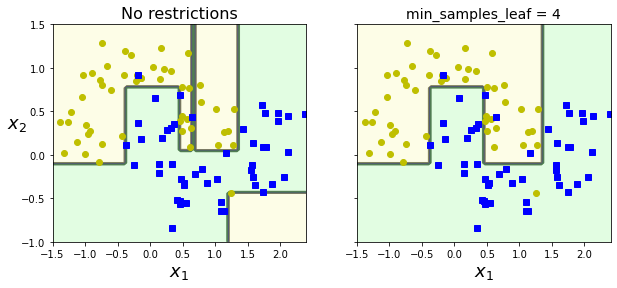

In [34]:
from sklearn.datasets import make_moons

# moons 데이터셋 사용
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# 규제 없는 모델
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
# 규제 있는 모델
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
# 모델 훈련하기
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# 그래프 그리기
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼편 그래프: 규제 없는 모델
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

# 오른편 그래프: 규제 있는 모델
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

## 의사결정나무와 회귀
* 사이킷런의 `DecisionTreeRegressor` 예측기를 이용하는 방법을 소개함

In [35]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

[Text(167.4, 181.2, 'X[0] <= 0.197\nmse = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(83.7, 108.72, 'X[0] <= 0.092\nmse = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(41.85, 36.23999999999998, 'mse = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.772\nmse = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(209.25, 36.23999999999998, 'mse = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(292.95, 36.23999999999998, 'mse = 0.036\nsamples = 46\nvalue = 0.615')]

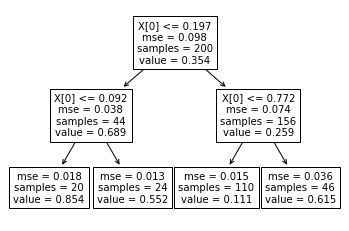

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

tree.plot_tree(tree_reg)

위 의사결정나무를 이용하여 예측하는 방법은 다음과 같음
예를 들어, `x1=0.6`인 샘플이 주어졌다고 가정하자.
이제 뿌리 마디에서 출발해서 아래 과정을 따라감

* `x1>0.197` 이므로 오른편 아래 마디로 이동
* `x1<=0.772` 이므로 왼편 아래 마디로 이동
* 도착한 잎에 해당하는 110개의 훈련 샘플의 평균 타깃값 `value=0.111`을 예측값으로 사용

각 마디에 포함된 속성은 다음과 같다.

* `samples`: 해당 마디에 속한 훈련 샘플 수
* `value`: 해당 마디에 속한 훈련 샘플의 평균 타깃값
* `mse`: 해당 마디에 속한 훈련 샘플의 평균제곱오차(mse). 오차 기준은 `value` 사용

앞서 생성한 2차 함수 형태의 훈련세트에 대한 비선형 회귀함수 그래프는 다음과 같이 그려짐

* 왼편 그래프: `max_depth=2`
* 오른편 그래프: `max_depth=3`

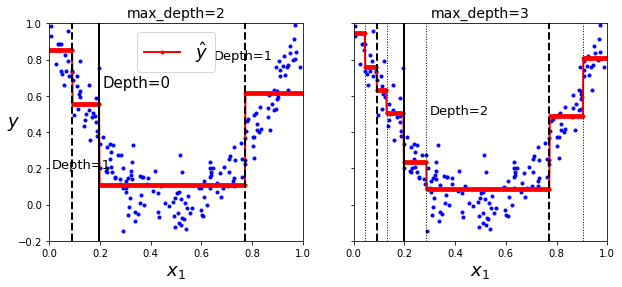

In [38]:
from sklearn.tree import DecisionTreeRegressor

# 왼편 그래프를 위한 의사결정나무 회귀 모델
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
# 오른편 그래프를 위한 의사결정나무 회귀 모델
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# 회귀 모델 그래프 그리는 함수
# 500개의 새로운 샘플에 대한 예측값 그리기.
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

# 그래프 그리기
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼편 그래프 그리기
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# 오른편 그래프 그리기
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

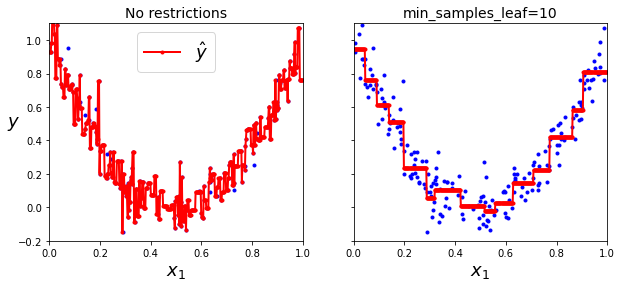

In [40]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
plt.show()

## 의사결정나무의 단점
* 의사결정나무 알고리즘은 성능이 매우 우수하지만 기본적으로 주어진 훈련 세트에 민감하게 반응하는 단점이 있음
    * 의사결정나무는 항상 축에 수직인 분할을 사용하기때문에, 조금만 회전을 가해도 결정 경계가 많이 달라짐
    * 훈련 세트의 작은 변화에 민감

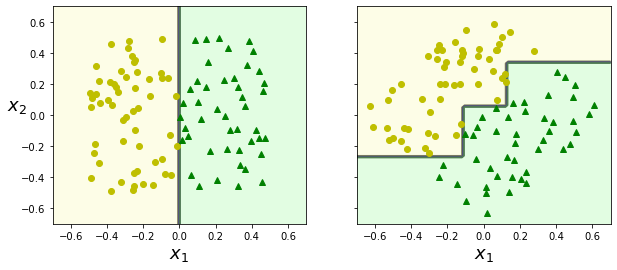

In [43]:
# 훈련 샘플을 x1, x2 모두 -0.6 ~ 0.6 구간에서 무작위로 100개 생성
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
# 타깃은 x1=0을 기준으로 분류
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# 오른편 의사결정나무 용도로 시계방향으로 45도 회전.
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

# 양쪽 모두 동일한 의사결정나무 알고리즘 활용. 규제 없음.
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

# 그래프 그리기
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼편 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# 오른편 그래프
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.ylabel("")
plt.show()

# 앙상블 학습과 랜덤 포레스트
## 다수결 분류기
* **다수결 분류기**(voting classifier)의 기본 개념은 동일한 훈련 세트에 대해 여러 종류의 분류기를 학습시킨 후 각 분류기의 예측을 모아 다수결 방식으로 예측값을 결정하는 것
* 이와 같이 작동하는 분류기를 **직접 투표**(hard voting) 분류기라 부름

* 반면에 사용되는 분류기가 모두 클래스에 포함될 확률을 계산하는 `predict_proba()` 메서드를 지원한다면 사용된 분류기의 확률 예측을 평균 내어 가장 높은 확률의 클래스를 선택할 수 있음
* 이렇게 작동하는 분류기를 **간접 투표**(soft voting) 분류기라 부름
* 확률이 높은 투표에 비중을 더 두기 때문에 직접 투표 방식보다 좀 더 좋은 성능을 발휘함
![img](http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier_files/majority_voting.png)

* 다수결 분류기를 사용하면 하나의 성능이 좋은 분류기를 사용하는 것보다 일반적으로 정확한 예측을 함
* 사이킷런의 `VotingClassifier`가 다수결 분류기 모델을 제공함

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

* 다음은 로지스틱 회귀, 랜덤 포레스트, 서포트 벡터머신 세 분류기를  이용하여 다수결 분류기를 생성한 후 학습함
* `voting='hard'`: 직접 투표 방식 선택
* 간접 투표 방식을 선택하려면 `'hard'` 대신에 `'soft'` 지정해야 함.

**참고**: 사이킷런의 향후 버전과의 호환성을 위해 다음 옵션 인자를 사용함. 
* `solver="lbfgs"`
* `n_estimators=100`
* `gamma="scale"`.

* 사용된 네 개의 분류기의 성능을 정확도를 이용하여 확인할 수 있음
* 다수결 분류기의 정확도가 91.2%로 개별 분류기보다 조금 더 성능이 좋음

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 선형 회귀 
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
# 랜덤 포레스트
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# 서포트 벡터 머신
svm_clf = SVC(gamma="scale", random_state=42)

# 다수결 분류기: 직접 투표 방식
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

# 다수결 분류기 학습
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# 분류기 별 정확도 측정
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__+':\t', accuracy_score(y_test, y_pred))

LogisticRegression:	 0.864
RandomForestClassifier:	 0.896
SVC:	 0.896
VotingClassifier:	 0.912


* 간접 투표 방식을 사용하면 정확도가 92%로 조금 더 올라감

* `voting='soft'` 사용
* SVC 모델의 경우 `predict_proba()` 메서드를 사용하기 위해 `probability=True` 옵션 인자를 지정해야 함

In [46]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

# 간접 투표 방식
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__+':\t', accuracy_score(y_test, y_pred))

LogisticRegression:	 0.864
RandomForestClassifier:	 0.896
SVC:	 0.896
VotingClassifier:	 0.92


## 배깅 대 페이스팅
* 사이킷런에서 제공하는 배깅/페이스팅 모델은 다음과 같음

* 분류 모델: `BaggingClassifier`
* 회귀 모델: `BaggingRegressor`

* 아래 코드는 의사결정나무를 이용하여 배깅 앙상블 학습을 진행함 

* `n_estimators=500`: 500개의 의사결정나무 학습기 훈련
* `max_samples=100`: 각각의 의사결정나무 분류기에 사용될 훈련 샘플 수가 100개. 기본값은 1.0
    * 정수일 경우 지정된 수 만큼의 샘플 사용
    * 부동소수점 ($\in [0, 1]$): 지정된 비율만큼의 샘플 사용. 즉, 기본값은 전체 샘플 수만큼 사용.
* `bootstrap=True`: 중복 허용 표본 추출. 기본값은 `True`, 즉, 기본적으로 배깅 지원.
* `n_jobs=-1`: 사용할 코어 수. -1은 가능한 모드 코어 사용.

* 의사결정나무의 경우처럼 `predict_proba()` 메서드가 지원되는 경우 자동으로 간접 투표(soft voting) 방식이 사용됨


* 중복선택을 허용하는 배깅 방식이 사용되는 샘플 부분집합의 다양성을 좀 더 키우며, 다음 효과를 가져옴
* 일반적으로 배깅 방식이 좀 더 편향은 키우고, 분산은 줄임
    * 표본 샘플링의 무작위성을 커지면서 예측기들 사이의 상관관계 정도가 약화되기 때문임
* 전반적으로 배깅 방식이 좀 더 나은 모델 생성
* 교차검증을 통해 항상 확인 필요

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=500,
    max_samples=100, 
    # bootstrap=True 가 기본값임.
#     bootstrap=True,
    n_jobs=-1,
    random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.904


In [50]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.856


In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

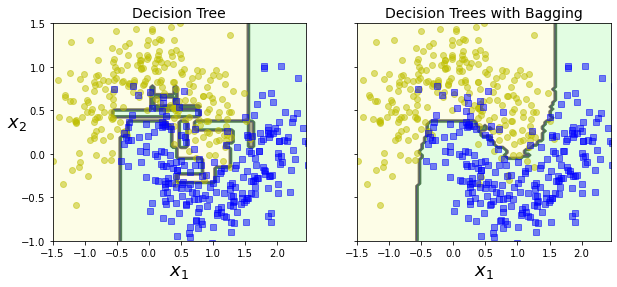

In [53]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

# 왼편 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)

# 오른편 그래프
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)

plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## 랜덤포레스트
* 배깅/페이스팅 방법을 적용한 의사결정나무의 앙상블을 최적화한 모델이 **랜덤 포레스트**(random forest)임

* 사이킷런에서 `RandomFrestClassifier`를 이용하여 랜덤 포레스트를 구현함
    * `n_estimators=500`: 500개의 의사결정나무 학습
    * `max_leaf_nodes=16`: 사용되는 의사결정나무의 잎의 수를 16개로 제한
    * `n_jobs=-1`: 가용 가능한 모든 CPU 사용

**참조**: 회귀용 예측기는 `RandomForestRegressor`를 사용하면 됨


In [54]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500, 
    max_leaf_nodes=16, 
    n_jobs=-1,
    random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [59]:
print(rnd_clf)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)


### 특성 중요도
* 랜덤 포레스트는 학습에 사용된 특성의 상대적 중요도도 함께 측정함
* 특성 중요도는 해당 특성을 사용한 마디가 평균적으로 불순도를 얼마나 감소시키는지를 측정함
* 즉, 불순도를 많이 줄이면 그만큼 중요도가 커짐

* 사이킷런의 `RandomForestClassifier`는 훈련이 끝난 뒤 특성별 중요도의 전체 합이 1이 되도록 하는 방식으로 특성별 상대적 중요도를 측정한 후 `feature_importances_` 속성에 저장함

In [60]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


* 아래 코드는 붓꽃 데이터셋에 대해 랜덤 포레스트를 적용한 후 특성별 중요도를 평가한 자료를 확인할 수 있음
    * 꽃잎 길이(petal length): 44.1%
    * 곷잎 너비(petal width): 42.3%
    * 꽃받침 길이(sepal length): 11.3%
    * 곷받침 너비(sepal width): 2.3%

### MNIST 데이터셋

In [61]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [ ]:
def plot_digit(data):
    # 28x28 사이즈로 형태 변환
    image = data.reshape(28, 28)
    # 그림 그리기
    plt.imshow(image, cmap = mpl.cm.hot, interpolation="nearest")
    # 축은 사용하지 않음.
    plt.axis("off")

# 이미지 속성 중요도 색으로 표현
plot_digit(rnd_clf.feature_importances_)

# 색상의 중요도를 보여주는 참조용 막대그래프. 오른편에 위치.
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

## 부스팅

**부스팅**(boosting)은 성능이 약한 학습기의 여러 개를 선형으로 연결하여 강한 성능의 학습기를 만드는 앙상블 기법을 의미함
즉, 여러 개의 학습기가 동시에 학습하는 것이 아니라 **순차적으로 이전 학습기의 결과를 바탕으로 성능을 조금씩 높혀가는 방식**으로 학습을 이어감
이런 이유로 배깅/페이스팅에 비해 확장성이 떨어진다는 단점을 갖음

이와같이 성능이 약한 예측기의 단점을 보완하여 보다 좋은 성능의 예측기를 훈련해 나가는 것이 **부스팅**의 기본 아이디어임
여기서는 가장 인기 높은 **에이다부스트**(AdaBoost)와 **그레이디언트부스팅**(Gradient Boosing)을 소개함

* 에이다부스트(AdaBoost)는 Adaptive Boosting의 줄임말임

### 에이다부스트
사이킷런은 `AdaBoostClassifier` 분류 모델과 `AdaBoostRegressor` 회귀 모델을 지원함
두 모델이 사용하는 알고리즘은 앞서 설명한 알고리즘을 다중 클래스 버전으로 일반화한 **SAMME** 라는 알고리즘을 사용함

사용되는 예측기가 `predict_proba()` 메서드를 지원하면 클래스에 속할 확률을 이용하는 **SAMME.R** 이라는 약간 변형된 알고리즘을 사용하며, 일반적으로 보다 성능이 좋음

아래 코드는 최대 깊이가 1인 의사결정나무 200개를 이용하는 에이다부스트 분류기를 구현하며, 이것이 에이다부스트의 기본 설정임

* `max_depth=1`: 잎이 아닌 마디가 단 하나뿐임. 즉, 뿌리 마디와 여러 개의 잎만 존재하는 의사결정나무



In [63]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=200,
    algorithm="SAMME.R", 
    learning_rate=0.5, 
    random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

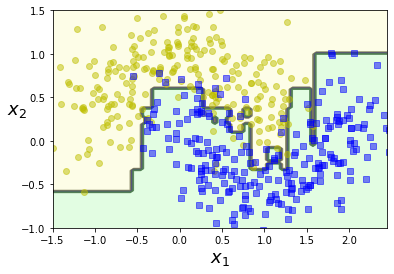

In [64]:
plot_decision_boundary(ada_clf, X, y)

### 그라디언트 부스팅
* 이전 학습기에 의한 오차를 보정하도록 새로운 예측기를 순차적으로 추가하는 아이디어는 에이다부스트와 동일
* 샘플의 가중치를 수정하는 대신 이전 예측기가 만든 **나머지 오차**(residual error)에 대해 새로운 예측기를 학습시킴

In [65]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [67]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    # 회귀 모델 리스트를 대상으로 예측값의 합 계산
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    
    # 기존 데이터셋과 레이블
    plt.plot(X[:, 0], y, data_style, label=data_label)
    # 새로운 데이터셋과 예측값
    plt.plot(x1, y_pred, style, linewidth=2, label=label)

    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

### 사이킷런 그레이디언트 부스팅 모델
* 사이킷런의 `GradientBoostingRegressor` 클래스가 제공하며,`RandomForestRegressor`와 비슷한 하이퍼파라미터를 제공함
    * `max_depth=2`: 의사결정나무 깊이 2
    * `n_estimators=3`: 3개의 의사결정나무 연속으로 훈련
    
* 기존 학습률: 하나의 모델이 학습되는 과정에서 샘플 특성의 가중치를 업데이트할 때 사용되는 손실함수의 그레이디언트 비율 지정
* 이전 의사결정나무에서 학습된 값을 전달할 때 사용되는 비율
    * 1.0이면 그대로 전달
    * 1.0보다 작으면 해당 비율 만큼 조금만 전달

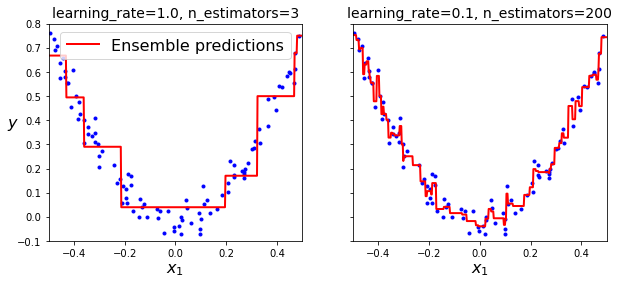

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

# 왼편 그래프 모델
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

# 오른편 그래프 모델
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

# 그래프 그리기
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

# 왼편 그래프
plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

# 오른편 그래프
plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.show()

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 이전 학습 내용을 지우고 새로 훈련하기 위해 훈련 세트 섞기. 
# random_state를 다른 값으로 지정.
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

# n_estimators 파라미터를 지정하지 않은 채로 모델 설정
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

# MSE 최솟값 보관용
min_val_error = float("inf")

# MSE의 변화가 없거나 나빠지는 횟수 측정. 5회까지 기다리기.
error_going_up = 0

# n_estimators를 1부터 120까지 실험
for n_estimators in range(1, 120):
    # GBRT의 n_estimators 설정 후 학습
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    
    # MSE 측정
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    
    # MSE가 낮아졌을 경우 최솟값 업데이트.
    # 아니면 5번 정도 기다렸다가 조기 종료할 것.
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [75]:
print(gbrt.n_estimators)

61


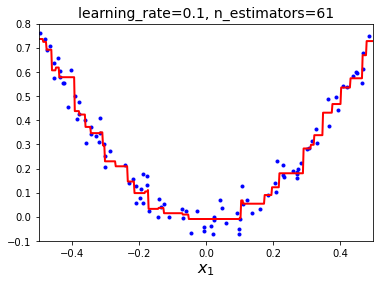

In [79]:
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.show()